In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
raw_data = pd.read_csv('LifeExpectancy.csv')

In [20]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          127 non-null    object 
 1   Year                             127 non-null    int64  
 2   Status                           127 non-null    object 
 3   Life expectancy                  127 non-null    float64
 4   Adult Mortality                  127 non-null    int64  
 5   infant deaths                    127 non-null    int64  
 6   Alcohol                          127 non-null    float64
 7   percentage expenditure           127 non-null    float64
 8   Hepatitis B                      127 non-null    int64  
 9   Measles                          127 non-null    int64  
 10   BMI                             127 non-null    float64
 11  under-five deaths                127 non-null    int64  
 12  Polio                 

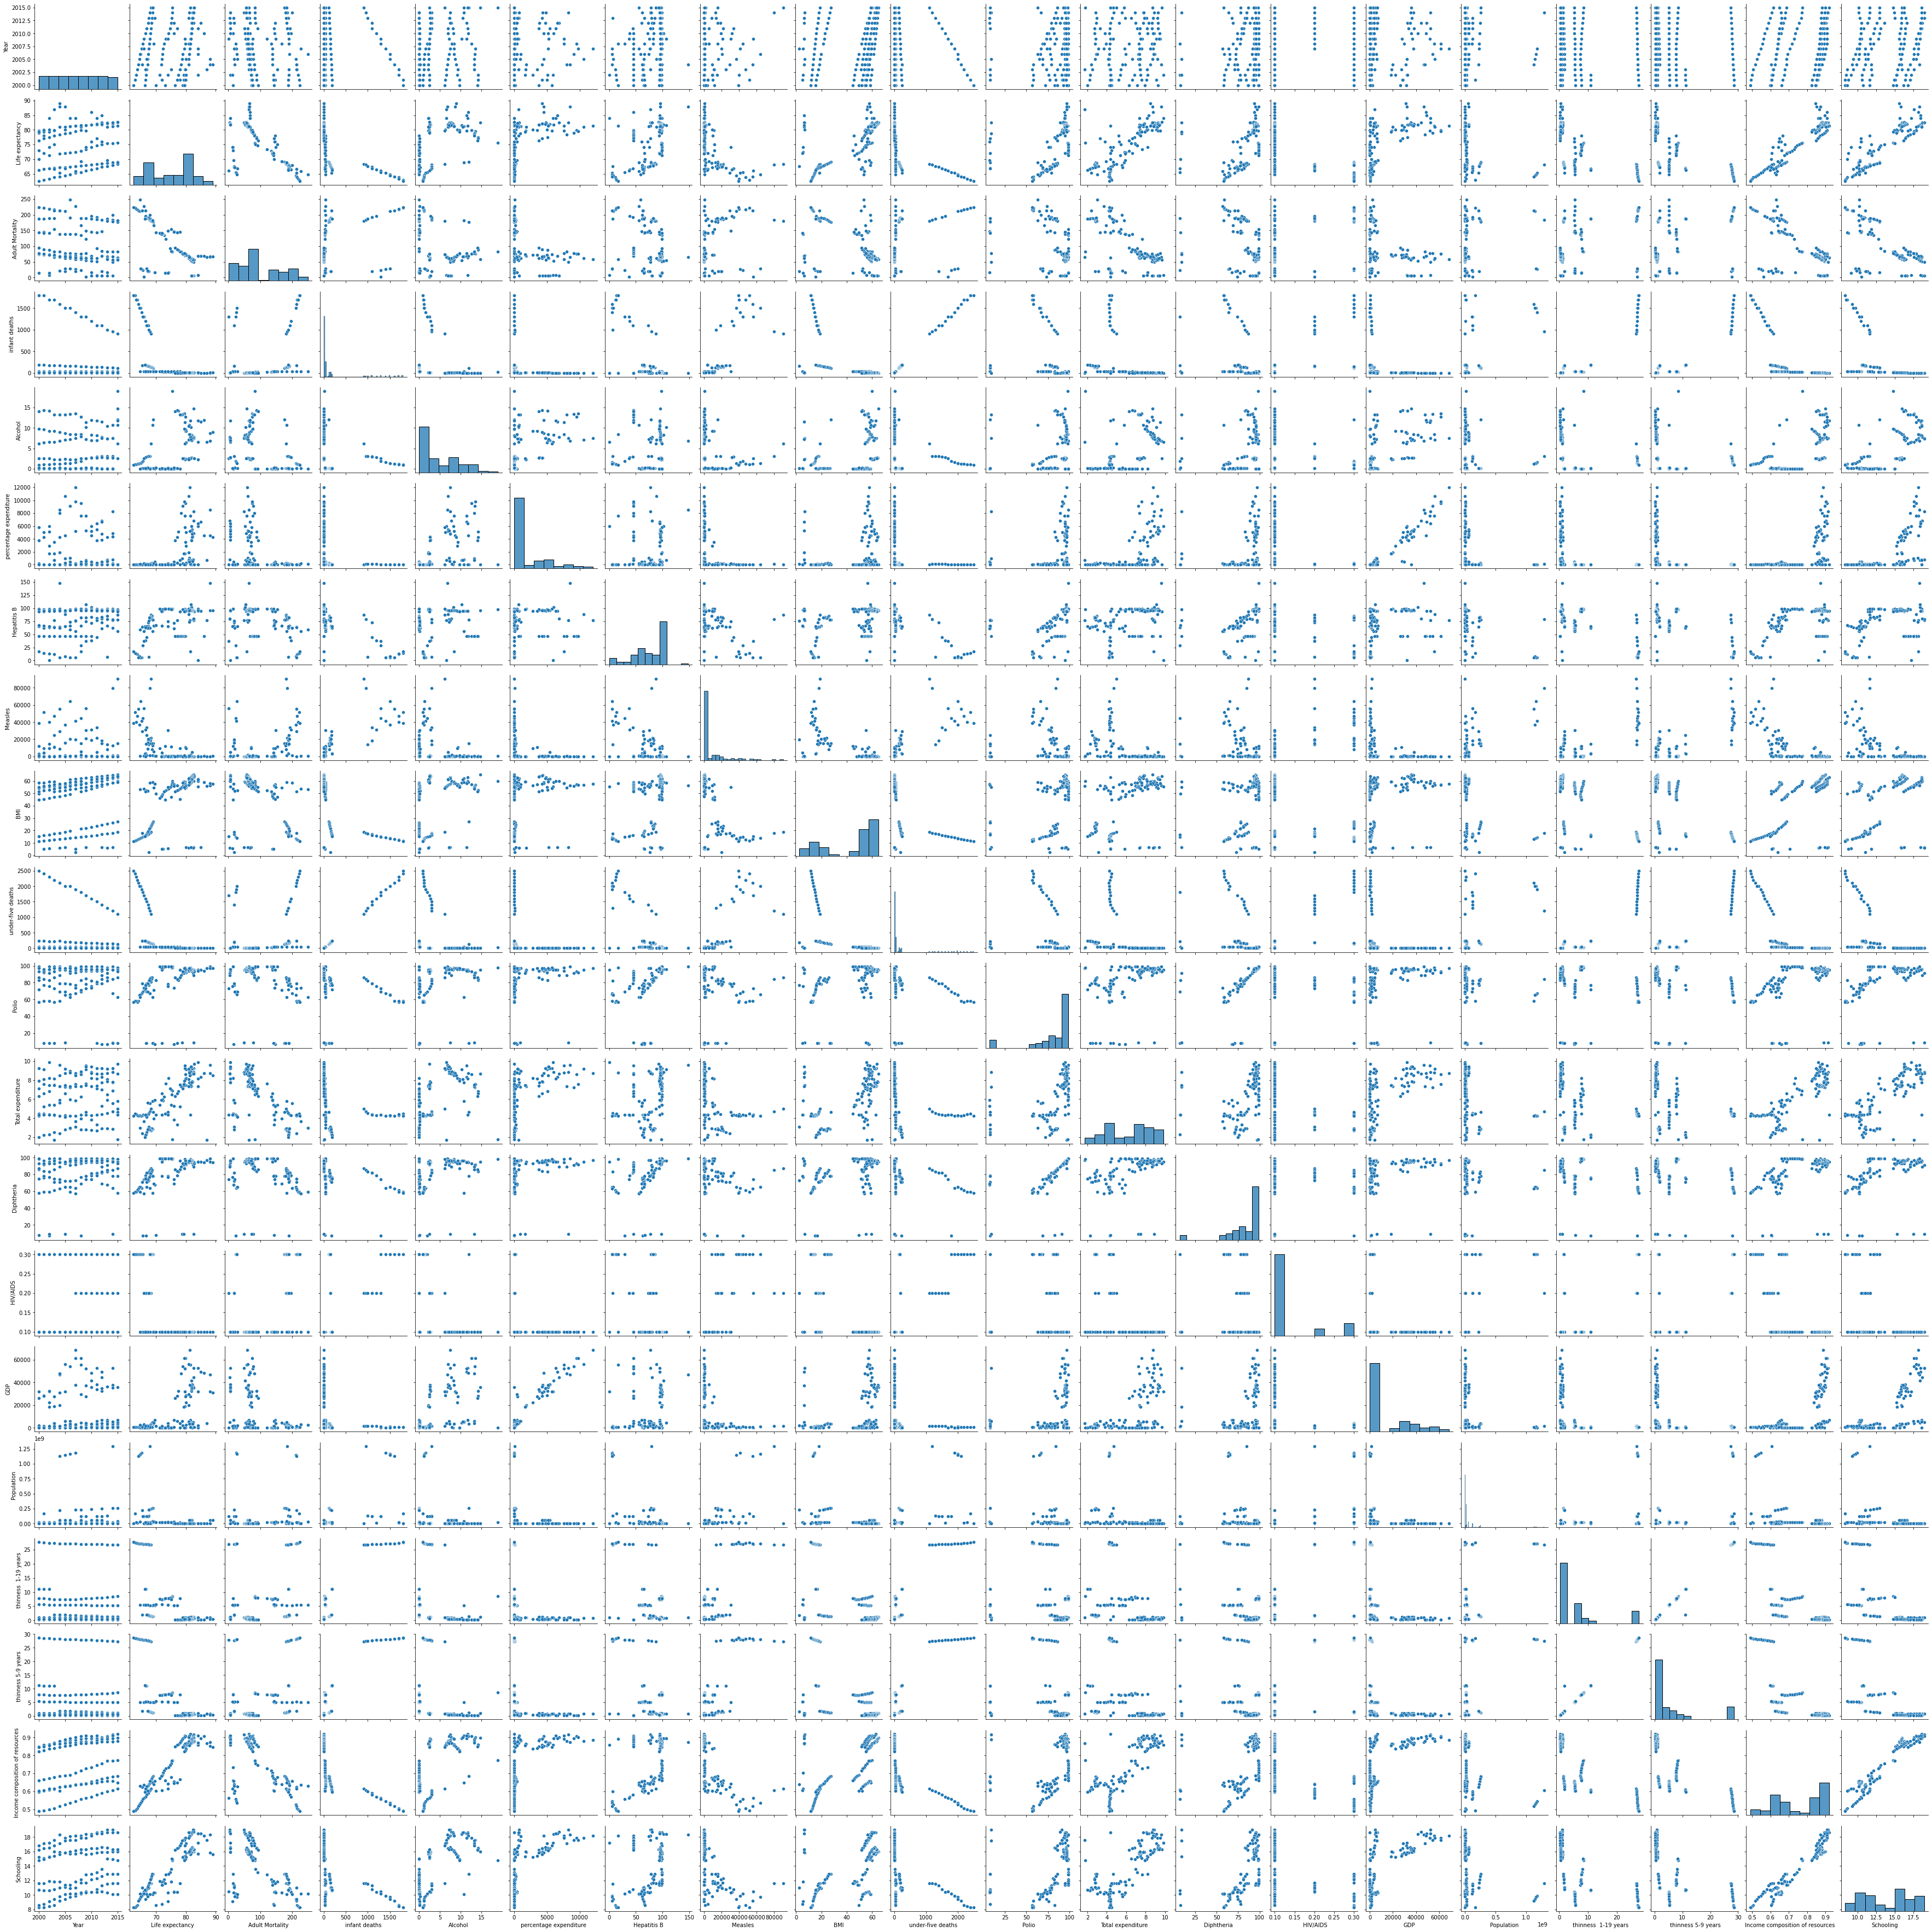

In [21]:
sns.pairplot(raw_data)

In [22]:
raw_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [23]:
x = raw_data[['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]

In [24]:
y = raw_data['Life expectancy ']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [29]:
model.fit(x_train, y_train)

LinearRegression()

In [30]:
print(model.coef_)

[-7.18119150e-02 -6.49222335e-03  2.16248520e-03  6.93693728e-02
 -3.07792421e-04  5.89075116e-02 -1.65574557e-05 -9.01799179e-04
 -2.84667030e-02  7.00502057e-01  1.71619306e-02 -9.10323964e+00
  7.60479202e-05  9.01951740e-10  2.82564128e-01 -3.04451955e-01
  2.96974471e+01 -1.58961301e-01]


In [31]:
print(model.intercept_)

192.3716074308498


In [32]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
Year,-7.181192e-02
Adult Mortality,-6.492223e-03
infant deaths,2.162485e-03
Alcohol,6.936937e-02
percentage expenditure,-3.077924e-04
Hepatitis B,5.890751e-02
Measles,-1.655746e-05
BMI,-9.017992e-04
Polio,-2.846670e-02
Total expenditure,7.005021e-01


In [33]:
predictions = model.predict(x_test)

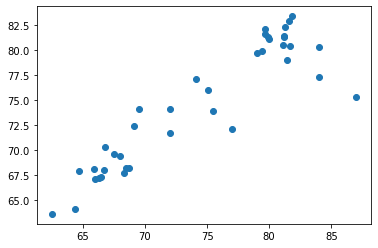

In [34]:
plt.scatter(y_test, predictions)

(array([ 4.,  9., 14.,  7.,  1.,  2.,  1.,  0.,  0.,  1.]),
 array([-4.60054942, -2.96490568, -1.32926194,  0.3063818 ,  1.94202555,
         3.57766929,  5.21331303,  6.84895678,  8.48460052, 10.12024426,
        11.755888  ]),
 <BarContainer object of 10 artists>)

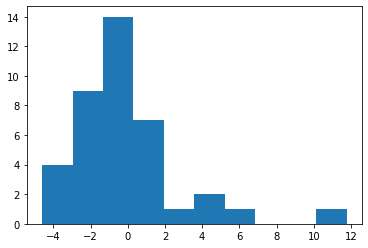

In [35]:
plt.hist(y_test - predictions)

In [36]:
from sklearn import metrics

In [37]:
metrics.mean_absolute_error(y_test, predictions)

2.003862182675662

In [38]:
metrics.mean_squared_error(y_test, predictions)

8.587536041463544

In [39]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

2.93044980190133

In [40]:
metrics.r2_score(y_test, predictions)

0.8227565260540108